In [154]:
## Import the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings ('ignore')


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE & Liner regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [155]:
#loading data
Leads = pd.read_csv("Leads.csv")

In [156]:
## Look at the head of the dataset
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [157]:
## Basic info of dataset
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [158]:
## Look at the missing values in the dataset

Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [159]:
## The columns Asymmetrique Activity Index/ Profile Index/ Activity Score/ Profile Score has about 50% data missing
## Need to drop the columns as the data may also be interpreted by other columns

Leads.drop (['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], inplace=True, axis=1)


Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Interested in other courses,Low in Relevance,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Ringing,NaN,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


In [160]:
## Also Leads Quality has about half missing values, dropping the same. This column contains data based on intution of sales rep

Leads.drop ('Lead Quality', inplace=True, axis=1)

Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [161]:
## Recheck info of the data frame

Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [162]:
##Next deal with the data with more tahn 1000 missing records

Leads[['Country','Tags','Lead Profile','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','City']]


,Country,Tags,Lead Profile,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,City
0,NaN,Interested in other courses,Select,Select,Select,Unemployed,Better Career Prospects,Select
1,India,Ringing,Select,Select,Select,Unemployed,Better Career Prospects,Select
2,India,Will revert after reading the email,Potential Lead,Business Administration,Select,Student,Better Career Prospects,Mumbai
3,India,Ringing,Select,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Mumbai
4,India,Will revert after reading the email,Select,Select,Other,Unemployed,Better Career Prospects,Mumbai
...,...,...,...,...,...,...,...,...
9235,Saudi Arabia,Will revert after reading the email,Potential Lead,IT Projects Management,Select,Unemployed,Better Career Prospects,Mumbai
9236,India,wrong number given,Potential Lead,Media and Advertising,Select,Unemployed,Better Career Prospects,Mumbai
9237,India,invalid number,Potential Lead,Business Administration,Select,Unemployed,Better Career Prospects,Mumbai
9238,India,NaN,NaN,Human Resource Management,Online Search,NaN,NaN,Other Metro Cities


In [163]:
## Look at each column seperately

Leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Canada                     4
South Africa               4
Germany                    4
Nigeria                    4
Kuwait                     4
Sweden                     3
Uganda                     2
China                      2
Ghana                      2
Netherlands                2
Philippines                2
Asia/Pacific Region        2
Bangladesh                 2
Italy                      2
Belgium                    2
Vietnam                    1
Malaysia                   1
Russia                     1
Denmark                    1
Tanzania                   1
Switzerland                1
Kenya         

In [164]:
## Can replace missing values with mode (in this case India)

## Look at the column 'Tags'

Leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [165]:
## Tags seem to be an important indicator, however a lot of records are missing in this column. This suggests that the 
## data was unavailable for a lot of records
Leads['Tags'].isnull().sum()/Leads['Tags'].shape[0]

0.36287878787878786

In [166]:
## In this case we cannot impute any values, we can however setermine the status or probability by other independent variables
## We would drop the column as of now and move ahead

In [167]:
## Next we study Lead Profile
#2709 missing values, total 6855 missing values
Leads['Lead Profile'].value_counts()
#Leads['Lead Profile'].isnull().sum()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [168]:
## This column has 2709 missing values, however the values Select can also be categorized as missing as it does not carry any sense
## we need to drop the column in this case

In [169]:
## Let's study Specialization 
## 1438 misssing values, total 3380 records are missing
Leads['Specialization'].value_counts()
#Leads['Specialization'].isnull().sum()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [170]:
## Will look into the dataset further to take decision later
## 2207 missing values
Leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [171]:
## Will look into the dataset further to take decision later
## 2690 missing values
Leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [172]:
## What matters most to you in choosing a course
## 2709 missing values
Leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [173]:
## City
## 1420 missing values, 3669 missing values
Leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [174]:
## Drop columns 'Tags','Lead Profile','Specialization','How did you hear about X Education','What is your current occupation','City'

Leads.drop (['Tags','Lead Profile','Specialization','How did you hear about X Education','City'],axis=1,inplace=True)

In [175]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [176]:
## Fill missing values in Country with India

## Look at other angle of dealing with country

Leads[(Leads['Country'] != 'India')]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
14,a8531c22-fcf1-48f8-a711-fb5abf98ad87,660553,Landing Page Submission,Direct Traffic,Yes,No,0,1.0,481,1.00,...,No,No,No,No,No,No,No,No,No,Email Bounced
16,3abb7c77-1634-4083-9a9f-861068220611,660540,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9217,b8872c12-7534-498d-8f4a-e79a19516db1,579786,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,SMS Sent
9225,787ab5f4-6f09-41c0-b083-55521ca23f8a,579744,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,74,2.00,...,No,No,No,No,No,No,No,No,Yes,Modified
9226,c3bb1471-53d5-4244-b2e5-4bbb543835c1,579735,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,No,No,No,No,Email Marked Spam


In [177]:
## Out of 2748 values, 2461 are null, thus very few countries are outside india, precisely only 287, means only 3% of data

## If we impute India as missing values, then majority data would only be India and thus column would add no significance to analysis

## Similar is case with 'What matters most to you in choosing a course' where everything is Better Career prospects

## We may drop both these Columns, and assume all entries from India & Better Career Prospects

## Also we would drop the rows where Country is not India

Leads['Country'].fillna ('India',inplace = True)
Leads['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Canada                     4
South Africa               4
Germany                    4
Nigeria                    4
Kuwait                     4
Sweden                     3
Uganda                     2
China                      2
Ghana                      2
Netherlands                2
Philippines                2
Asia/Pacific Region        2
Bangladesh                 2
Italy                      2
Belgium                    2
Vietnam                    1
Malaysia                   1
Russia                     1
Denmark                    1
Tanzania                   1
Switzerland                1
Kenya         

In [178]:
## Look at conversion rate in other countries
Leads[(Leads['Country']!='India')]['Converted'].sum()

84

In [179]:
Leads[(Leads['Country']!='India')]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
14,a8531c22-fcf1-48f8-a711-fb5abf98ad87,660553,Landing Page Submission,Direct Traffic,Yes,No,0,1.0,481,1.00,...,No,No,No,No,No,No,No,No,No,Email Bounced
87,0fc49a08-63d2-4fef-98c1-244bfd6d12a9,659644,Landing Page Submission,Direct Traffic,No,No,0,6.0,97,3.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
103,95f1c454-9f9a-40ef-b521-6fc791f103fb,659469,Landing Page Submission,Direct Traffic,No,No,0,2.0,638,2.00,...,No,No,No,No,No,No,No,No,Yes,Modified
207,fad4be87-d418-4746-b951-cd405a98b631,658288,API,Organic Search,No,No,0,5.0,358,5.00,...,No,No,No,No,No,No,No,No,No,Modified
243,2de32d4e-8972-4fca-a8cc-93c1f8b30d23,657902,API,Olark Chat,No,No,0,7.0,1130,2.33,...,No,No,No,No,No,No,No,No,Yes,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,3e483954-1508-4b8b-9534-59f8a2a2dc6b,580353,Landing Page Submission,Organic Search,No,No,0,5.0,255,5.00,...,No,No,No,No,No,No,No,No,Yes,Modified
9173,83cb9ffe-39e8-4b68-bb13-e3be447d4586,580104,Landing Page Submission,Direct Traffic,Yes,No,0,1.0,53,1.00,...,No,No,No,No,No,No,No,No,No,Modified
9225,787ab5f4-6f09-41c0-b083-55521ca23f8a,579744,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,74,2.00,...,No,No,No,No,No,No,No,No,Yes,Modified
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,No,No,No,No,Email Marked Spam


In [180]:
Leads = Leads [(Leads['Country'] == 'India')]
Leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9233,3f715465-2546-47cd-afa8-8b8dc63b8b43,579622,API,Direct Traffic,No,No,1,13.0,1409,2.6,...,No,No,No,No,No,No,No,No,No,SMS Sent
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.5,...,No,No,No,No,No,No,No,No,No,Modified
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent


In [181]:
## Drop Country & What matters most to you in choosing a course columns

Leads.drop(['Country', 'What matters most to you in choosing a course'], axis=1, inplace = True)
Leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9233,3f715465-2546-47cd-afa8-8b8dc63b8b43,579622,API,Direct Traffic,No,No,1,13.0,1409,2.6,...,No,No,No,No,No,No,No,No,No,SMS Sent
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.5,...,No,No,No,No,No,No,No,No,No,Modified
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent


In [182]:
## What is your current occupation column

Leads['What is your current occupation'].fillna('Unemployed',inplace=True)
Leads['What is your current occupation'].value_counts()

Unemployed              8028
Working Professional     684
Student                  208
Other                     16
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [183]:
Leads.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Update me on Supply Chain Content       

In [184]:
## Look at columns Lead Source, TotalVisits, Page Views Per Visit, Last Activity

Leads['Lead Source'].value_counts()

Google               2830
Direct Traffic       2363
Olark Chat           1748
Organic Search       1104
Reference             533
Welingak Website      142
Referral Sites        116
Facebook               54
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [185]:
## Some datacleaning which may be done in this columns, google to be replaced with Google, delete null value rows
## also delete sorces with very less values starting from bing, click2call etc.
Leads['Lead Source'] = Leads['Lead Source'].replace(['google'],'Google')
Leads['Lead Source'].value_counts()

Google               2835
Direct Traffic       2363
Olark Chat           1748
Organic Search       1104
Reference             533
Welingak Website      142
Referral Sites        116
Facebook               54
bing                    6
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
WeLearn                 1
testone                 1
blog                    1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [186]:
## REMOVING NULL VALUES AND LOW COUNT SOURCES FROM DATA

Leads = Leads[(Leads['Lead Source'].isin (['Google','Direct Traffic','Olark Chat','Organic Search','Reference','Welingak Website','Referral Sites','Facebook']))]
Leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9233,3f715465-2546-47cd-afa8-8b8dc63b8b43,579622,API,Direct Traffic,No,No,1,13.0,1409,2.6,...,No,No,No,No,No,No,No,No,No,SMS Sent
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.5,...,No,No,No,No,No,No,No,No,No,Modified
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent


In [187]:
## TotalVisits & Page Views Per Visit both have 137 values missing

Leads_NOVISIT = Leads[Leads['TotalVisits'].isnull()]

## As expected both these column values are Null in these cases

#Leads['TotalVisits'].value_counts()

## 97 of 130 have converted in this case which is really high, we cannot directly delete these records

## At the moment let us store this dataframe seperately and move ahead 

Leads_NOVISIT

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,...,No,No,No,No,No,No,No,No,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,1,NaN,705,NaN,...,No,No,No,No,No,No,No,No,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,...,No,No,No,No,No,No,No,No,No,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,...,No,No,No,No,No,No,No,No,No,Modified
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,82f3035c-0750-4f09-a0cc-4288abb88042,587973,Lead Add Form,Reference,No,No,0,NaN,1201,NaN,...,No,No,No,No,No,No,No,No,No,Modified
8107,7e66be45-783c-4983-b4cd-c6594bbbeee8,587916,Lead Add Form,Reference,No,No,1,NaN,903,NaN,...,No,No,No,No,No,No,No,No,No,Modified
8434,f5be8a84-bfa2-46a6-816a-af81a45ea6b9,585438,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,...,No,No,No,No,No,No,No,No,No,Modified
9015,5857eeef-41cb-4523-a654-8709f6c8d8c6,581257,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,...,No,No,No,No,No,No,No,No,No,Modified


In [188]:
## Drop null values rows

Leads.dropna(subset=['TotalVisits'],inplace=True)

Leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9233,3f715465-2546-47cd-afa8-8b8dc63b8b43,579622,API,Direct Traffic,No,No,1,13.0,1409,2.6,...,No,No,No,No,No,No,No,No,No,SMS Sent
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.5,...,No,No,No,No,No,No,No,No,No,Modified
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent


In [189]:
Leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

In [190]:
Leads['Last Notable Activity'].value_counts()

Modified                        3158
Email Opened                    2720
SMS Sent                        2088
Page Visited on Website          304
Olark Chat Conversation          180
Email Link Clicked               164
Email Bounced                     59
Unsubscribed                      41
Unreachable                       32
Had a Phone Conversation          14
Email Received                     1
Email Marked Spam                  1
Resubscribed to emails             1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [191]:
## Check Last Activity & Last Notable Activity Columns

Leads [['Last Activity','Last Notable Activity']]

## These both columns appear to be same with some differences. However as we are interested in converting customers, we should keep Last Activity column
## And remove Last Notable Activity Column

,Last Activity,Last Notable Activity
0,Page Visited on Website,Modified
1,Email Opened,Email Opened
2,Email Opened,Email Opened
3,Unreachable,Modified
4,Converted to Lead,Modified
...,...,...
9233,SMS Sent,SMS Sent
9234,SMS Sent,Modified
9236,SMS Sent,SMS Sent
9237,SMS Sent,SMS Sent


In [192]:
Leads['Last Activity'].value_counts()

Email Opened                    3312
SMS Sent                        2636
Olark Chat Conversation          958
Page Visited on Website          610
Converted to Lead                409
Email Bounced                    291
Email Link Clicked               257
Form Submitted on Website        111
Unreachable                       86
Unsubscribed                      55
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 4
Email Received                     2
Visited Booth in Tradeshow         1
Email Marked Spam                  1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [193]:
## REMOVING LOW COUNT SOURCES FROM Last Activity Column

Leads = Leads[(Leads['Last Activity'].isin (['Email Opened','SMS Sent','Olark Chat Conversation','Page Visited on Website','Converted to Lead','Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation']))]
Leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9233,3f715465-2546-47cd-afa8-8b8dc63b8b43,579622,API,Direct Traffic,No,No,1,13.0,1409,2.6,...,No,No,No,No,No,No,No,No,No,SMS Sent
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.5,...,No,No,No,No,No,No,No,No,No,Modified
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent


In [194]:
Leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

In [195]:
## NOW THE DATASET IS FREE OF NULL VALUES
## NEXT WE WOULD HANDLE OUTLIERS, Also we would convert Yes to 1 & No to 0

num_Leads = Leads[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']]
num_Leads.describe (percentiles=[0.25,0.5,0.75,0.9,0.95,0.995])

,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,8750.000000,8750.000000,8750.000000
mean,480.246743,3.434057,2.352985
std,545.869411,4.899650,2.162578
min,0.000000,0.000000,0.000000
25%,4.000000,1.000000,1.000000
50%,242.000000,3.000000,2.000000
75%,920.000000,5.000000,3.250000
90%,1373.000000,7.000000,5.000000
95%,1557.000000,10.000000,6.000000
99.5%,1926.785000,20.255000,11.000000


In [196]:
## Clearly there are outliers in data, Let's segggregate that portion of the data

Leads_TV = Leads[(Leads['TotalVisits']>21)]
Leads_TV

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
469,5e2436a2-a011-4ac6-8165-b7300cc81fd4,655360,Landing Page Submission,Organic Search,No,No,0,22.0,59,5.50,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
1160,424e4ffd-efc9-4dc8-8cd2-5cf3b3e56223,647818,Landing Page Submission,Direct Traffic,No,No,0,43.0,57,3.91,...,No,No,No,No,No,No,No,No,No,Email Opened
1741,15400e7f-1771-4440-864e-7b229132c3b2,642439,Landing Page Submission,Direct Traffic,Yes,No,0,22.0,601,1.38,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
1824,8fe92f1a-1d93-472e-9ab3-91d0d9ac4f62,641781,Landing Page Submission,Direct Traffic,No,No,0,30.0,68,10.00,...,No,No,No,No,No,No,No,No,Yes,Modified
2154,b6fa82dc-e10b-4f8a-ba5c-575c17d97024,639121,API,Olark Chat,No,No,1,23.0,1677,2.09,...,No,No,No,No,No,No,No,No,No,Olark Chat Conversation
2190,0e4c0711-6cb5-455d-8e0d-7f9f2cc4f895,638668,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,...,No,No,No,No,No,No,No,No,Yes,Modified
2322,272696ed-4aff-4b42-8829-b63f122493d9,637257,Landing Page Submission,Direct Traffic,Yes,No,0,141.0,755,6.71,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
2323,342dae00-4302-4c63-a891-7fc61ff0ea15,637256,API,Direct Traffic,No,No,0,25.0,67,3.57,...,No,No,No,No,No,No,No,No,No,Page Visited on Website
2563,ce04a5a0-e2ad-4281-9b8f-32ad6b184a80,634882,Landing Page Submission,Direct Traffic,No,No,0,27.0,386,5.40,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
2861,dc888c15-9a7b-42f0-9843-3a989033071f,632239,Landing Page Submission,Organic Search,No,No,0,29.0,209,2.90,...,No,No,No,No,No,No,No,No,Yes,Modified


In [197]:
## Page Views per visit
Leads_PV = Leads[(Leads['Page Views Per Visit']>11)]
Leads_PV

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
56,59e722da-edff-43d9-af61-f5c8bcc986c4,659998,Landing Page Submission,Referral Sites,No,No,1,13.0,436,13.00,...,No,No,No,No,No,No,No,No,No,Modified
125,46921843-bfc8-443d-96f8-18495891aef6,659241,API,Referral Sites,No,No,0,16.0,53,16.00,...,No,No,No,No,No,No,No,No,No,Modified
168,ba13e654-406e-4d3f-9fc1-0803087a41eb,658756,Landing Page Submission,Referral Sites,No,No,0,12.0,493,12.00,...,No,No,No,No,No,No,No,No,Yes,Email Link Clicked
246,e15342a3-ca98-4401-8a76-a7ff920546c7,657882,API,Referral Sites,No,No,0,14.0,354,14.00,...,No,No,No,No,No,No,No,No,No,Modified
292,4beec5ec-bdea-4ecd-ab89-345060e38bc2,657316,Landing Page Submission,Direct Traffic,No,No,0,13.0,194,13.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
387,23911ee3-0be8-4985-9ef6-a372791eecf0,656382,Landing Page Submission,Google,No,No,0,15.0,753,15.00,...,No,No,No,No,No,No,No,No,Yes,Modified
579,eda6996c-7d0b-46ce-ad60-f2ee9c85c148,654278,API,Organic Search,No,No,0,13.0,99,13.00,...,No,No,No,No,No,No,No,No,No,Modified
1697,7211d363-f4e7-4d36-b2f5-7ba34c502062,642886,API,Google,No,No,0,14.0,148,14.00,...,No,No,No,No,No,No,No,No,No,Email Opened
2190,0e4c0711-6cb5-455d-8e0d-7f9f2cc4f895,638668,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,...,No,No,No,No,No,No,No,No,Yes,Modified
2950,83c10034-a3e5-4836-b5b5-d9068ef237cc,631467,Landing Page Submission,Google,No,No,1,14.0,17,14.00,...,No,No,No,No,No,No,No,No,Yes,Modified


In [198]:
## Total Time Spent on Website
Leads_TT = Leads[(Leads['Total Time Spent on Website']>1927)]
Leads_TT

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
170,e70118b9-8fc8-4810-b665-3551a60813ef,658714,API,Referral Sites,No,No,0,2.0,1944,2.00,...,No,No,No,No,No,No,No,No,No,Email Opened
211,f942f0fe-55e2-4e23-bae8-346c55278fb0,658264,Landing Page Submission,Direct Traffic,No,No,1,9.0,1953,1.80,...,No,No,No,No,No,No,No,No,No,Modified
337,360558c9-5f2d-4244-8984-a4b5c34bfcf9,656859,Landing Page Submission,Google,No,No,0,7.0,1939,2.33,...,No,No,No,No,No,No,No,No,No,Email Opened
819,638fecaf-4479-4dd0-8785-cfb9e492d817,651807,Landing Page Submission,Google,No,No,1,11.0,2069,5.50,...,No,No,No,No,No,No,No,No,Yes,Email Opened
892,4377b169-87ec-484c-abf8-c06b3ec21e65,650918,Landing Page Submission,Google,No,No,1,6.0,1966,6.00,...,No,No,No,No,No,No,No,No,No,Email Opened
982,d1b54285-80f1-4feb-8947-14d03cdc2c56,649691,Landing Page Submission,Google,No,No,1,3.0,1995,3.00,...,No,No,No,No,No,No,No,No,No,Modified
1454,2c2de880-420f-4ff8-a0e5-b1ae22006258,644906,Landing Page Submission,Google,No,No,1,6.0,1975,6.00,...,No,No,No,No,No,No,No,No,No,Email Link Clicked
1534,712e84ad-8afc-41ff-8631-7fdd0a7d669e,644111,API,Organic Search,No,No,0,2.0,1978,2.00,...,No,No,No,No,No,No,No,No,No,Modified
1675,264b9c84-e4f6-45e9-9caa-93aa4ed8facc,643053,Landing Page Submission,Google,No,No,1,8.0,2137,8.00,...,No,No,No,No,No,No,No,No,No,SMS Sent
1739,3a9bdbef-856b-4d92-bc31-c78a6a03b4ab,642452,Landing Page Submission,Direct Traffic,No,No,1,2.0,1948,2.00,...,No,No,No,No,No,No,No,No,Yes,SMS Sent


In [199]:
High_VISIT_FINAL = pd.concat([Leads_TV,Leads_PV,Leads_TT],axis=0)
High_VISIT_FINAL

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
469,5e2436a2-a011-4ac6-8165-b7300cc81fd4,655360,Landing Page Submission,Organic Search,No,No,0,22.0,59,5.50,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
1160,424e4ffd-efc9-4dc8-8cd2-5cf3b3e56223,647818,Landing Page Submission,Direct Traffic,No,No,0,43.0,57,3.91,...,No,No,No,No,No,No,No,No,No,Email Opened
1741,15400e7f-1771-4440-864e-7b229132c3b2,642439,Landing Page Submission,Direct Traffic,Yes,No,0,22.0,601,1.38,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
1824,8fe92f1a-1d93-472e-9ab3-91d0d9ac4f62,641781,Landing Page Submission,Direct Traffic,No,No,0,30.0,68,10.00,...,No,No,No,No,No,No,No,No,Yes,Modified
2154,b6fa82dc-e10b-4f8a-ba5c-575c17d97024,639121,API,Olark Chat,No,No,1,23.0,1677,2.09,...,No,No,No,No,No,No,No,No,No,Olark Chat Conversation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8745,3441441c-4cb1-4acd-b7b4-9dda679a30d9,583083,API,Organic Search,No,No,1,3.0,2253,3.00,...,No,No,No,No,No,No,No,No,No,Email Opened
8787,05a31293-dc3c-4791-b560-3079791b955d,582776,API,Google,No,No,1,2.0,2170,1.00,...,No,No,No,No,No,No,No,No,No,SMS Sent
9026,0d8d21f9-43a6-4bd8-a185-e53457dc3329,581165,Landing Page Submission,Direct Traffic,No,No,0,2.0,1982,2.00,...,No,No,No,No,No,No,No,No,Yes,Modified
9108,6e2bb2ce-9e9c-438e-be09-3ffda8537f61,580548,Landing Page Submission,Organic Search,No,No,0,4.0,1965,4.00,...,No,No,No,No,No,No,No,No,No,SMS Sent


In [200]:
## As we have seperated this dataframe, we would remove these from our master dataframe
Leads = Leads.drop(index=High_VISIT_FINAL.index)
Leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9233,3f715465-2546-47cd-afa8-8b8dc63b8b43,579622,API,Direct Traffic,No,No,1,13.0,1409,2.6,...,No,No,No,No,No,No,No,No,No,SMS Sent
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.5,...,No,No,No,No,No,No,No,No,No,Modified
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent


In [201]:
## Replace all Yes with 1 & No with 0 in entire dataframe
Leads.replace(to_replace='No', value=0,inplace = True)
Leads.replace(to_replace='Yes', value=1, inplace= True)
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,0,Modified


In [202]:
## BLANK

In [203]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8642 entries, 0 to 9238
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               8642 non-null   object 
 1   Lead Number                               8642 non-null   int64  
 2   Lead Origin                               8642 non-null   object 
 3   Lead Source                               8642 non-null   object 
 4   Do Not Email                              8642 non-null   int64  
 5   Do Not Call                               8642 non-null   int64  
 6   Converted                                 8642 non-null   int64  
 7   TotalVisits                               8642 non-null   float64
 8   Total Time Spent on Website               8642 non-null   int64  
 9   Page Views Per Visit                      8642 non-null   float64
 10  Last Activity                       

In [204]:
## Create Dummies for objects
Lead_Objects = ['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity']
Leads[Lead_Objects]

,Lead Origin,Lead Source,Last Activity,What is your current occupation,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Unemployed,Modified
1,API,Organic Search,Email Opened,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Student,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Unemployed,Modified
4,Landing Page Submission,Google,Converted to Lead,Unemployed,Modified
...,...,...,...,...,...
9233,API,Direct Traffic,SMS Sent,Unemployed,SMS Sent
9234,Landing Page Submission,Direct Traffic,SMS Sent,Unemployed,Modified
9236,Landing Page Submission,Direct Traffic,SMS Sent,Unemployed,SMS Sent
9237,Landing Page Submission,Direct Traffic,SMS Sent,Unemployed,SMS Sent


In [205]:
## Create dummies

Lead_Origin = pd.get_dummies(Leads['Lead Origin'],drop_first = True)
Lead_Source = pd.get_dummies(Leads['Lead Source'],drop_first = True)
Last_Activity = pd.get_dummies(Leads['Last Activity'],drop_first = True)
Occupation = pd.get_dummies(Leads['What is your current occupation'],drop_first = True)
#LastActivity = pd.get_dummies(Leads['Last Notable Activity'],drop_first = True)

In [206]:
## MERGE THE DUMMIES

Leads = pd.concat ([Leads,Lead_Origin,Lead_Source,Last_Activity,Occupation],axis=1)

## Delete columns whose dummy variables have been created
Leads = Leads.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity'],axis=1)
Leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,Housewife,Other,Student,Unemployed,Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [207]:
## Data preprocessing steps for building LR model

X = Leads.drop(['Prospect ID','Lead Number','Converted'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,Housewife,Other,Student,Unemployed,Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [208]:
# y of the dataset
y = Leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [209]:
## Test train split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [210]:
## SCaling the nukmeric variables

scaler = StandardScaler()

## Scaling the data
X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,Housewife,Other,Student,Unemployed,Working Professional
5698,0,0,-1.044219,-0.882734,-1.176335,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7020,0,0,-1.044219,-0.882734,-1.176335,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6958,1,0,-0.075830,0.491795,-0.413063,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5001,0,0,1.215356,-0.215957,2.385603,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6637,0,0,3.152135,-0.430145,0.477421,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [211]:
import statsmodels.api as sm

## Logistic regression model

logm1 = sm.GLM (y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6049
Model:                            GLM   Df Residuals:                     6014
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2459.1
Date:                Fri, 08 Oct 2021   Deviance:                       4918.1
Time:                        22:42:31   Pearson chi2:                 6.08e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2339      1.257     -1.777      0.076      -4.699       0.231
Do Not Email                                -1.3076      0.218     -6.003      0.000      -1.734      -0.881
Do Not Call                                 22.1739   3.14e+04      0.001      0.999   -6.16e+04    6.16e+04
TotalVisits                                  0.3122      0.053      5.929      0.000       0.209       0.415
Total Time Spent on Website                  1.1691      0.042     27.740      0.000       1.086       1.252
Page Views Per Visit                        -0.2120      0.058     -3.654      0.000      -0.326      -0.098
Search                                      -0.7749      0.889     -0.871      0.384      -2.518       0.968
Magazine                                  1.109e-09   2.89e-06      0.000      1.000   -5.67e-06    5.67e-06
Newspaper Article                        -1.953e-09    2.5e-06     -0.001      0.999    -4.9e-06    4.89e-06
X Education Forums                       -1.229e-09   3.32e-06     -0.000      1.000    -6.5e-06     6.5e-06
Newspaper                                  -24.6542   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                       21.7989   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Through Recommendations                     20.4243   2.13e+04      0.001      0.999   -4.18e+04    4.18e+04
Receive More Updates About Our Courses    3.093e-10   3.12e-06   9.91e-05      1.000   -6.11e-06    6.12e-06
Update me on Supply Chain Content        -1.763e-10   6.27e-07     -0.000      1.000   -1.23e-06    1.23e-06
Get updates on DM Content                -7.806e-11   2.37e-06  -3.29e-05      1.000   -4.65e-06    4.65e-06
I agree to pay the amount through cheque  1.922e-09   2.28e-06      0.001      0.999   -4.47e-06    4.47e-06
A free copy of Mastering The Interview      -0.1028      0.112     -0.922      0.357      -0.321       0.116
Landing Page Submission                     -0.1038      0.111     -0.935      0.350      -0.321       0.114
Lead Add Form                              -21.4651   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Import                                  0.6657      0.253      2.626      0.009       0.169       1.163
Facebook                                     0.6657      0.253      2.626      0.009       0.169       1.163
Google                                       0.1357      0.119      1.139      0.255      -0.098       0.369
Olark Chat                                   1.3012      0.167      7.781      0.000       0.973       1.629
Organic Search                              -0.0193      0.135     -0.143      0.886      -0.284       0.245
Reference                      

In [212]:
## THIS IS A VERY BASIC MODEL WITH A LOT OF VARIABLES WITH HIGH P VALUES 
## LET's BEGIN BY COARSE TUNING USING RFE

In [213]:
## Feature selection with RFE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15) ## Check with initial 15 variables
rfe = rfe.fit(X_train,y_train)

rfe.support_

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

col = X_train.columns[rfe.support_]

X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Lead Import', 'Google', 'Organic Search', 'Referral Sites',
       'Email Bounced', 'Email Link Clicked', 'Email Opened',
       'Form Submitted on Website', 'Page Visited on Website', 'Unreachable',
       'Housewife', 'Other'],
      dtype='object')

In [214]:
## Assesing the model with Stats Models

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM (y_train,X_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6049
Model:                            GLM   Df Residuals:                     6033
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2517.2
Date:                Fri, 08 Oct 2021   Deviance:                       5034.5
Time:                        22:42:41   Pearson chi2:                 6.10e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.1029      0.549     -0.188      0.851      -1.178       0.972
Do Not Email                   -1.7058      0.186     -9.195      0.000      -2.069      -1.342
Total Time Spent on Website     1.1802      0.041     28.525      0.000       1.099       1.261
Newspaper                     -21.9841   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Add Form                 -19.3502   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Facebook                        1.4602      0.492      2.971      0.003       0.497       2.424
Olark Chat                      1.3492      0.106     12.775      0.000       1.142       1.556
Reference                      23.3649   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Welingak Website               25.2615   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Had a Phone Conversation        2.4878      0.874      2.848      0.004       0.775       4.200
Olark Chat Conversation        -1.5847      0.175     -9.068      0.000      -1.927      -1.242
SMS Sent                        1.4325      0.076     18.727      0.000       1.283       1.582
Unsubscribed                    1.1141      0.507      2.196      0.028       0.120       2.109
Student                        -1.1440      0.592     -1.931      0.053      -2.305       0.017
Unemployed                     -1.4203      0.550     -2.584      0.010      -2.498      -0.343
Working Professional            1.3948      0.581      2.400      0.016       0.256       2.534
===============================================================================================
"""

In [215]:
## Improve the model by dropping high P values columns

## Columns Newspaper, Lead Add Form, Reference, Welingak Website all have 0.999 as p values
## Start by dropping Newspaper Column

X_train_sm.drop(['Newspaper','const'],axis=1,inplace=True)
X_train_sm.head()

,Do Not Email,Total Time Spent on Website,Lead Add Form,Facebook,Olark Chat,Reference,Welingak Website,Had a Phone Conversation,Olark Chat Conversation,SMS Sent,Unsubscribed,Student,Unemployed,Working Professional
5698,0,-0.882734,1,0,0,1,0,0,0,0,0,0,0,1
7020,0,-0.882734,0,0,1,0,0,0,0,1,0,0,1,0
6958,1,0.491795,0,0,1,0,0,0,0,0,0,0,1,0
5001,0,-0.215957,0,0,0,0,0,0,0,0,0,0,1,0
6637,0,-0.430145,0,0,0,0,0,0,0,0,0,0,1,0


In [216]:
## Assesing the model with Stats Models

X_train_sm = sm.add_constant(X_train_sm)
logm3 = sm.GLM (y_train,X_train_sm,family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6049
Model:                            GLM   Df Residuals:                     6034
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2518.9
Date:                Fri, 08 Oct 2021   Deviance:                       5037.8
Time:                        22:42:41   Pearson chi2:                 6.10e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.1018      0.548     -0.186      0.853      -1.177       0.973
Do Not Email                   -1.7045      0.185     -9.189      0.000      -2.068      -1.341
Total Time Spent on Website     1.1775      0.041     28.498      0.000       1.097       1.258
Lead Add Form                 -19.3499   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Facebook                        1.4582      0.492      2.966      0.003       0.495       2.422
Olark Chat                      1.3471      0.106     12.759      0.000       1.140       1.554
Reference                      23.3624   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Welingak Website               25.2587   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Had a Phone Conversation        2.4883      0.873      2.849      0.004       0.776       4.200
Olark Chat Conversation        -1.5832      0.175     -9.062      0.000      -1.926      -1.241
SMS Sent                        1.4336      0.076     18.749      0.000       1.284       1.583
Unsubscribed                    1.1147      0.507      2.198      0.028       0.121       2.109
Student                        -1.1446      0.592     -1.933      0.053      -2.305       0.016
Unemployed                     -1.4221      0.549     -2.588      0.010      -2.499      -0.345
Working Professional            1.3935      0.581      2.399      0.016       0.255       2.532
===============================================================================================
"""

In [217]:
## Improve the model by dropping high P values columns

## Columns Lead Add Form, Reference, Welingak Website all have 0.999 as p values
## Drop Lead Add Form Column

X_train_sm.drop(['Lead Add Form','const'],axis=1,inplace=True)
X_train_sm.head()

,Do Not Email,Total Time Spent on Website,Facebook,Olark Chat,Reference,Welingak Website,Had a Phone Conversation,Olark Chat Conversation,SMS Sent,Unsubscribed,Student,Unemployed,Working Professional
5698,0,-0.882734,0,0,1,0,0,0,0,0,0,0,1
7020,0,-0.882734,0,1,0,0,0,0,1,0,0,1,0
6958,1,0.491795,0,1,0,0,0,0,0,0,0,1,0
5001,0,-0.215957,0,0,0,0,0,0,0,0,0,1,0
6637,0,-0.430145,0,0,0,0,0,0,0,0,0,1,0


In [218]:
## Assesing the model with Stats Models

X_train_sm = sm.add_constant(X_train_sm)
logm4 = sm.GLM (y_train,X_train_sm,family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6049
Model:                            GLM   Df Residuals:                     6035
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2519.1
Date:                Fri, 08 Oct 2021   Deviance:                       5038.3
Time:                        22:42:42   Pearson chi2:                 6.10e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.1018      0.548     -0.186      0.853      -1.177       0.973
Do Not Email                   -1.7043      0.185     -9.188      0.000      -2.068      -1.341
Total Time Spent on Website     1.1776      0.041     28.499      0.000       1.097       1.259
Facebook                        1.4584      0.492      2.967      0.003       0.495       2.422
Olark Chat                      1.3456      0.106     12.748      0.000       1.139       1.553
Reference                       4.0126      0.233     17.196      0.000       3.555       4.470
Welingak Website                5.9088      0.730      8.096      0.000       4.478       7.339
Had a Phone Conversation        2.4885      0.873      2.849      0.004       0.777       4.200
Olark Chat Conversation        -1.5820      0.175     -9.055      0.000      -1.924      -1.240
SMS Sent                        1.4341      0.076     18.755      0.000       1.284       1.584
Unsubscribed                    1.1151      0.507      2.199      0.028       0.121       2.109
Student                        -1.1445      0.592     -1.933      0.053      -2.305       0.016
Unemployed                     -1.4223      0.549     -2.589      0.010      -2.499      -0.345
Working Professional            1.3935      0.581      2.399      0.016       0.255       2.532
===============================================================================================
"""

In [219]:
## Improve the model by dropping high P values columns

## Columns Student has p value of 0.053
## May drop this column

X_train_sm.drop(['Student','const'],axis=1,inplace=True)
X_train_sm.head()

,Do Not Email,Total Time Spent on Website,Facebook,Olark Chat,Reference,Welingak Website,Had a Phone Conversation,Olark Chat Conversation,SMS Sent,Unsubscribed,Unemployed,Working Professional
5698,0,-0.882734,0,0,1,0,0,0,0,0,0,1
7020,0,-0.882734,0,1,0,0,0,0,1,0,1,0
6958,1,0.491795,0,1,0,0,0,0,0,0,1,0
5001,0,-0.215957,0,0,0,0,0,0,0,0,1,0
6637,0,-0.430145,0,0,0,0,0,0,0,0,1,0


In [220]:
## Assesing the model with Stats Models

X_train_sm = sm.add_constant(X_train_sm)
logm5 = sm.GLM (y_train,X_train_sm,family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6049
Model:                            GLM   Df Residuals:                     6036
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2521.1
Date:                Fri, 08 Oct 2021   Deviance:                       5042.1
Time:                        22:42:42   Pearson chi2:                 6.10e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0756      0.208     -5.182      0.000      -1.482      -0.669
Do Not Email                   -1.7077      0.185     -9.211      0.000      -2.071      -1.344
Total Time Spent on Website     1.1790      0.041     28.545      0.000       1.098       1.260
Facebook                        1.4588      0.492      2.968      0.003       0.495       2.422
Olark Chat                      1.3430      0.106     12.729      0.000       1.136       1.550
Reference                       4.0093      0.233     17.192      0.000       3.552       4.466
Welingak Website                5.9103      0.730      8.098      0.000       4.480       7.341
Had a Phone Conversation        2.4873      0.873      2.847      0.004       0.775       4.199
Olark Chat Conversation        -1.5815      0.175     -9.056      0.000      -1.924      -1.239
SMS Sent                        1.4315      0.076     18.717      0.000       1.282       1.581
Unsubscribed                    1.1167      0.507      2.201      0.028       0.122       2.111
Unemployed                     -0.4471      0.208     -2.147      0.032      -0.855      -0.039
Working Professional            2.3687      0.281      8.426      0.000       1.818       2.920
===============================================================================================
"""

In [221]:
## P Values have stabilized, let's look if we have high VIF and remove them to improve the model

X_train_new = X_train_sm.drop(['const'],axis=1)
# Let's calculate VIF for this model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round (vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
10,Unemployed,1.95
3,Olark Chat,1.78
8,SMS Sent,1.57
7,Olark Chat Conversation,1.43
1,Total Time Spent on Website,1.31
4,Reference,1.22
11,Working Professional,1.22
0,Do Not Email,1.18
9,Unsubscribed,1.09
5,Welingak Website,1.05


In [222]:
## VIF VALUES ARE ALSO STABLE, WE MAY CONCLUDE THAT THE MODEL IS NOW STABLE
## WE WOULD GO AHEAD AND PREDICT AS PER MODEL DEVELOPED

In [223]:
## GIVE A SCORE OUT OF 100
y_train_pred = res.predict(X_train_sm)
(y_train_pred*100).astype(int)

5698    98
7020    55
6958    21
5001    14
6637    11
        ..
388     59
85      13
8592    95
7399     2
6014    33
Length: 6049, dtype: int32

In [224]:
y_train_pred [:10]

5698    0.986097
7020    0.552563
6958    0.212889
5001    0.144635
6637    0.116106
7149    0.033220
2526    0.354717
922     0.906679
4726    0.766209
139     0.077745
dtype: float64

In [225]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98609688, 0.55256335, 0.2128891 , 0.14463542, 0.11610644,
       0.03322041, 0.35471677, 0.90667918, 0.766209  , 0.07774538])

In [226]:
y_train_pred_final = pd.DataFrame ({'Lead': y_train.values, 'Lead_Prob' : y_train_pred})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Lead,Lead_Prob,Lead_ID
0,1,0.986097,5698
1,0,0.552563,7020
2,0,0.212889,6958
3,0,0.144635,5001
4,0,0.116106,6637


In [227]:
y_train_pred_final['Predicted'] = y_train_pred_final['Lead_Prob'].map(lambda x: 1 if x>0.5 else 0)

## LOOK at the head of the data
y_train_pred_final.head()

,Lead,Lead_Prob,Lead_ID,Predicted
0,1,0.986097,5698,1
1,0,0.552563,7020,1
2,0,0.212889,6958,0
3,0,0.144635,5001,0
4,0,0.116106,6637,0


In [228]:
## LOOK AT THE CONFUSION MATRIX
from sklearn import metrics
confusion = metrics.confusion_matrix (y_train_pred_final['Lead'], y_train_pred_final['Predicted'])
print (confusion)

[[3306  438]
 [ 683 1622]]


In [229]:
# Predicted   not_predicted    predicted
# Actual
# not_predicted  3306             438
# predicted       683             708

In [230]:
## Overall accuracy of the model
print (metrics.accuracy_score(y_train_pred_final['Lead'],y_train_pred_final['Predicted']))
## Accuracy is fine, about 81.47%

0.8146801124152753


In [231]:
# Let's look at other metrices, Sensitivity Specificity
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negativies
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negativies

In [232]:
# Sensitivity
TP/float (TP+FN)

0.7036876355748373

In [233]:
# Specificity
TN/float (TN+FP)

0.8830128205128205

In [234]:
# False Positive rate - predicting Lead when the customer was not lead
print (FP/float(TN+FP))

0.11698717948717949


In [235]:
# Positive predictive value
print (TP/float(TP+FP))

0.7873786407766991


In [236]:
def draw_roc (actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve (actual,probs,drop_intermediate = False)
    auc_score = metrics.roc_auc_score (actual,probs)
    plt.figure (figsize =(5,5))
    plt.figure()
    plt.plot(fpr, tpr, label = 'ROC Curve(area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic - Lead Score')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [237]:
fpr,tpr,thresholds = metrics.roc_curve (y_train_pred_final['Lead'],y_train_pred_final['Predicted'])

<Figure size 360x360 with 0 Axes>

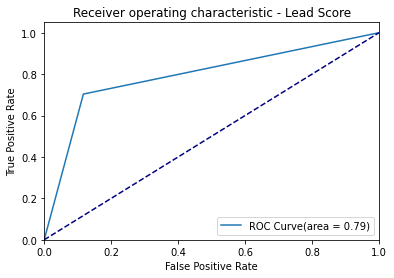

In [238]:
draw_roc(y_train_pred_final['Lead'],y_train_pred_final['Predicted'])

In [239]:
## Optimal cut off point
## Problem statement is to obtain lead conversion rate as 80%
numbers = [float(x)/10 for x in range (10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Lead_Prob'].map(lambda x:1 if x>i else 0)
y_train_pred_final

,Lead,Lead_Prob,Lead_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.986097,5698,1,1,1,1,1,1,1,1,1,1,1
1,0,0.552563,7020,1,1,1,1,1,1,1,0,0,0,0
2,0,0.212889,6958,0,1,1,1,0,0,0,0,0,0,0
3,0,0.144635,5001,0,1,1,0,0,0,0,0,0,0,0
4,0,0.116106,6637,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044,0,0.596799,388,1,1,1,1,1,1,1,0,0,0,0
6045,0,0.138499,85,0,1,1,0,0,0,0,0,0,0,0
6046,1,0.955665,8592,1,1,1,1,1,1,1,1,1,1,1
6047,0,0.023061,7399,0,1,0,0,0,0,0,0,0,0,0


In [240]:
## Calculate accuracy, sensitivity & specificity for probab cut offs
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num =[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Lead'],y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
print (cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381055  1.000000  0.000000
0.1   0.1  0.610845  0.966594  0.391827
0.2   0.2  0.738800  0.923644  0.625000
0.3   0.3  0.801124  0.833839  0.780983
0.4   0.4  0.814845  0.763991  0.846154
0.5   0.5  0.814680  0.703688  0.883013
0.6   0.6  0.793024  0.583948  0.921741
0.7   0.7  0.780625  0.513666  0.944979
0.8   0.8  0.760291  0.422126  0.968483
0.9   0.9  0.714664  0.269848  0.988515


<Figure size 720x720 with 0 Axes>

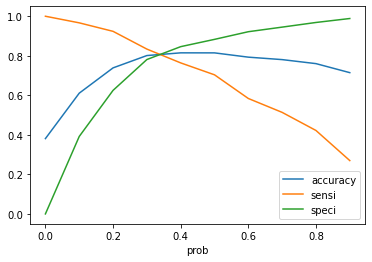

In [241]:
# plot accuracy, sensitivity & specificity
plt.figure(figsize=(10,10))
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [242]:
##0.35 seems to be optimum value
## Our business problem is to maximize the lead conversion rate, which means that we are interested to capture maximum number of actual leads
## In business terms, we do cannot afford to miss any potential lead. Also we want that if we identify a hot lead conversion rate should be 80%
## mathematically sensitivity >0.8 is required

In [243]:
## Let's build model with  cut off score as 0.35 rather than 0.5 we chose earlier
# Let's see the earlier dataframe
y_train_pred_final

,Lead,Lead_Prob,Lead_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.986097,5698,1,1,1,1,1,1,1,1,1,1,1
1,0,0.552563,7020,1,1,1,1,1,1,1,0,0,0,0
2,0,0.212889,6958,0,1,1,1,0,0,0,0,0,0,0
3,0,0.144635,5001,0,1,1,0,0,0,0,0,0,0,0
4,0,0.116106,6637,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044,0,0.596799,388,1,1,1,1,1,1,1,0,0,0,0
6045,0,0.138499,85,0,1,1,0,0,0,0,0,0,0,0
6046,1,0.955665,8592,1,1,1,1,1,1,1,1,1,1,1
6047,0,0.023061,7399,0,1,0,0,0,0,0,0,0,0,0


In [244]:
## Drop the earlier columns
y_train_pred_final.drop(['Predicted',0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis=1,inplace=True)
y_train_pred_final

,Lead,Lead_Prob,Lead_ID
0,1,0.986097,5698
1,0,0.552563,7020
2,0,0.212889,6958
3,0,0.144635,5001
4,0,0.116106,6637
...,...,...,...
6044,0,0.596799,388
6045,0,0.138499,85
6046,1,0.955665,8592
6047,0,0.023061,7399


In [245]:
## New prdicted variable column
y_train_pred_final['Predicted'] = y_train_pred_final['Lead_Prob'].map(lambda x:1 if x>0.35 else 0)
y_train_pred_final

,Lead,Lead_Prob,Lead_ID,Predicted
0,1,0.986097,5698,1
1,0,0.552563,7020,1
2,0,0.212889,6958,0
3,0,0.144635,5001,0
4,0,0.116106,6637,0
...,...,...,...,...
6044,0,0.596799,388,1
6045,0,0.138499,85,0
6046,1,0.955665,8592,1
6047,0,0.023061,7399,0


In [246]:
## LOOK AT THE CONFUSION MATRIX
from sklearn import metrics
confusion = metrics.confusion_matrix (y_train_pred_final['Lead'], y_train_pred_final['Predicted'])
print (confusion)

[[3060  684]
 [ 459 1846]]


In [247]:
## Overall accuracy of the model
print (metrics.accuracy_score(y_train_pred_final['Lead'],y_train_pred_final['Predicted']))
## Accuracy is fine, about 81.10%

0.811043147627707


In [248]:
# Let's look at other metrices, Sensitivity Specificity
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negativies
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negativies

In [249]:
# Sensitivity
TP/float (TP+FN)

0.8008676789587853

In [250]:
# Specificity
TN/float (TN+FP)

0.8173076923076923

In [251]:
# False Positive rate - predicting Lead when the customer was not lead
print (FP/float(TN+FP))

0.18269230769230768


In [252]:
# Positive predictive value
print (TP/float(TP+FP))

0.7296442687747036


In [253]:
## As we see in the case above, to obtain improvement in Sensitivity we compromised on FPR, i.e. we ended up predicting more actual non lead cases to lEad

In [254]:
## TEST THE DATA ON TEST STATE

scaler = StandardScaler()

## Scaling the data
X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,Housewife,Other,Student,Unemployed,Working Professional
386,0,0,0.243259,-0.537516,0.862023,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
328,0,0,-1.008892,-0.873369,-1.124999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7634,0,0,-0.382816,-0.351765,-0.628244,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6294,1,0,-1.008892,-0.873369,-1.124999,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1264,0,0,-0.069779,2.040488,0.365268,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [255]:
# Add constant
X_test_sm = sm.add_constant(X_test[['Do Not Email','Total Time Spent on Website','Facebook','Olark Chat','Reference','Welingak Website','Had a Phone Conversation','Olark Chat Conversation','SMS Sent','Unsubscribed','Unemployed','Working Professional']])

In [256]:
# Make prediction
y_test_pred= res.predict(X_test_sm)

In [257]:
#['Do Not Email','Total Time Spent on Website','Facebook','Olark Chat','Reference','Welingak Website','Had a Phone Conversation','Olark Chat Conversation','SMS Sent','Unsubscribed','Unemployed','Working Professional'


In [258]:
y_test_pred.head(10)

386     0.103733
328     0.229810
7634    0.355617
6294    0.184583
1264    0.332121
1257    0.386577
127     0.017313
6431    0.430914
6247    0.022702
8460    0.331184
dtype: float64

In [259]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [260]:
#Conver y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Put Lead_ID in index
y_test_df['Lead_ID'] = y_test_df.index

In [261]:
# Remove index from both dataframe for viewing side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
#Append y_test_df & y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [262]:
y_pred_final.head()

,Converted,Lead_ID,0
0,0,386,0.103733
1,0,328,0.229810
2,0,7634,0.355617
3,1,6294,0.184583
4,1,1264,0.332121


In [263]:
# Renaming Column
y_pred_final = y_pred_final.rename(columns={0:'Lead_Prob'})
# Rearrange column
y_pred_final = y_pred_final.reindex(['Lead_ID','Converted','Lead_Prob'],axis=1)
y_pred_final.head()

,Lead_ID,Converted,Lead_Prob
0,386,0,0.103733
1,328,0,0.229810
2,7634,0,0.355617
3,6294,1,0.184583
4,1264,1,0.332121


In [264]:
y_pred_final['final_predicted'] = y_pred_final['Lead_Prob'].map(lambda x:1 if x>0.35 else 0)
y_pred_final.head()

,Lead_ID,Converted,Lead_Prob,final_predicted
0,386,0,0.103733,0
1,328,0,0.229810,0
2,7634,0,0.355617,1
3,6294,1,0.184583,0
4,1264,1,0.332121,0


In [265]:
## Overall accuracy of the prediction
print (metrics.accuracy_score(y_pred_final['Converted'],y_pred_final['final_predicted']))
## Very minor drop in accuracy, from 81 to 78.36 which can be expected

0.7836482838411107


In [266]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'],y_pred_final['final_predicted'])
confusion2

array([[1254,  357],
       [ 204,  778]], dtype=int64)

In [267]:
# Let's look at other metrices, Sensitivity Specificity
TP = confusion2[1,1] # true positives
TN = confusion2[0,0] # true negativies
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negativies

In [268]:
# Sensitivity
TP/float (TP+FN)

0.7922606924643585

In [269]:
# Specificity
TN/float (TN+FP)

0.7783985102420856

In [270]:
# False Positive rate - predicting Lead when the customer was not lead
print (FP/float(TN+FP))

0.22160148975791433


In [271]:
# Positive predictive value
print (TP/float(TP+FP))

0.6854625550660793


In [272]:
## OUR MODEL PERFORMED WELL ON TEST SET AS WELL, WITH A DESCENT ACCURACY & SENSITIVITY AS PER REQUIREMENT
## ALSO ROC CURVE IS SATISFACTORY
## RELOOK AT OUR DEVELOPED MODEL

#const - -1.0756
#Do Not Email - -1.7077
#Total Time Spent on Website - 1.1790
#Facebook- 1.4588
#Olark Chat - 1.3430
#Reference -4.0093
#Welingak Website -5.9103
#Had a Phone Conversation -2.4873
#Olark Chat Conversation --1.5815
#SMS Sent -1.4315
#Unsubscribed -1.1167
#Unemployed	-0.4471
#Working Professional - 2.3687


In [273]:
## IN BUSINESS TERMS BROADLY THE CONVERSION OF LEADS IMPROVES THE BEST IF THEY HAVE CAME THROGH Welingak Website
## AND THROUGH REFERENCE (HAVING HIGHEST POSITIVE COEFFICIENTS)

## NEXT POSITIVE INDICATORS ARE IF THE CLIENT HAS HAD A PHONE CALL AND IS A WORKING PROFESSIONAL

## NEXT POSITIVE INDICATOR IS IF LEAD SOURCE IS FACEBOOK, HOWEVER THE RECORDS ARE TOO LESS TO CONFIRM THE OBSERVATION

## SOME NEGETIVE INDICATORS ARE IF THE CLIENT HAS OPTED FOR NOT RECEIVING EMAILS (DO NOT EMAIL) AND IF HE IS UNEMPLOYED

In [274]:
y_train_pred_final.head()

,Lead,Lead_Prob,Lead_ID,Predicted
0,1,0.986097,5698,1
1,0,0.552563,7020,1
2,0,0.212889,6958,0
3,0,0.144635,5001,0
4,0,0.116106,6637,0


In [275]:
y_pred_final.head()

,Lead_ID,Converted,Lead_Prob,final_predicted
0,386,0,0.103733,0
1,328,0,0.229810,0
2,7634,0,0.355617,1
3,6294,1,0.184583,0
4,1264,1,0.332121,0


In [276]:
y_train_pred_final = y_train_pred_final.reindex(['Lead_ID','Lead','Lead_Prob','Predicted'],axis=1)
y_train_pred_final = y_train_pred_final.rename(columns={'Lead':'Converted'})

In [277]:
y_train_pred_final

,Lead_ID,Converted,Lead_Prob,Predicted
0,5698,1,0.986097,1
1,7020,0,0.552563,1
2,6958,0,0.212889,0
3,5001,0,0.144635,0
4,6637,0,0.116106,0
...,...,...,...,...
6044,388,0,0.596799,1
6045,85,0,0.138499,0
6046,8592,1,0.955665,1
6047,7399,0,0.023061,0


In [278]:
y_pred_final = y_pred_final.rename(columns={'final_predicted':'Predicted'})
y_pred_final.head()

,Lead_ID,Converted,Lead_Prob,Predicted
0,386,0,0.103733,0
1,328,0,0.229810,0
2,7634,0,0.355617,1
3,6294,1,0.184583,0
4,1264,1,0.332121,0


In [279]:
## AS PER PROBLEM STATEMENT WE NEED TO GIVE A SCORE OUT OF 100
## AS WE KNOW CUT OFF IS 35, WE WOULD RECOMMEND X EDUCATION TO TARGET THE CLIENTS WITH SCORE GREATER THAN 35

## MERGE THE DATAFRAMES y_pred_final, y_train_pred_final

## FINAL OUTPUT FOR COMPANY
SCORE_CLIENT = pd.concat([y_pred_final,y_train_pred_final], axis=0)
SCORE_CLIENT

,Lead_ID,Converted,Lead_Prob,Predicted
0,386,0,0.103733,0
1,328,0,0.229810,0
2,7634,0,0.355617,1
3,6294,1,0.184583,0
4,1264,1,0.332121,0
...,...,...,...,...
6044,388,0,0.596799,1
6045,85,0,0.138499,0
6046,8592,1,0.955665,1
6047,7399,0,0.023061,0


In [280]:
## WE MAY DROP CONVERTED AND PREDICTED COLUMNS AND RENAME LEAD_PROB AS CLIENT_SCORE AND MULTIPLY PROBABILITIES BY 100
SCORE_CLIENT = SCORE_CLIENT.rename(columns={'Lead_Prob':'SCORE_CLIENT'})
SCORE_CLIENT.drop(['Converted','Predicted'],axis=1, inplace=True)
SCORE_CLIENT['SCORE_CLIENT'] = SCORE_CLIENT['SCORE_CLIENT']*100
SCORE_CLIENT

,Lead_ID,SCORE_CLIENT
0,386,10.373335
1,328,22.980973
2,7634,35.561714
3,6294,18.458263
4,1264,33.212083
...,...,...
6044,388,59.679906
6045,85,13.849876
6046,8592,95.566518
6047,7399,2.306082


In [281]:
## EARLIER IN THE PROBLEM WE HAD SEPERATED TWO DATAFRAMES, High_VISIT_FINAL & Leads_NOVISIT 
## High_VISIT_FINAL (This shall be ignored as the data recorded in this dataframe is unusually high and may be falsely recorded)
## Leads_NOVISIT (These records were taken from clients who had not visited the site at all, thus we would be misguided if this data is taken for analysis)

In [282]:
## FINAL OUTPUT FOR X EDUCATION

## TARGET ALL CLIENTS WITH SCORE>35 IN BELOW DATAFRAME, TO GET 80% LEAD CONVERSION
SCORE_CLIENT

,Lead_ID,SCORE_CLIENT
0,386,10.373335
1,328,22.980973
2,7634,35.561714
3,6294,18.458263
4,1264,33.212083
...,...,...
6044,388,59.679906
6045,85,13.849876
6046,8592,95.566518
6047,7399,2.306082
